In [75]:
import pandas as pd
import nltk
import json
import matplotlib as plt
import seaborn as sns

In [34]:
df_88 = pd.read_csv('../../Test-Data/pre-final-88-genre.csv')
df_88.head(1)

,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,energy,...,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre
0,0,BIBI Vengeance,Lowlife Princess: Noir,BIBI,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,0.748,...,0.0895,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '..."


In [35]:
new_df88 = pd.DataFrame({'artist_name': df_88['artist'], 'lyrics': df_88['filtered_lyrics']})
new_df88.head(1)

,artist_name,lyrics
0,BIBI,Watch me danceWatch me sing Watch me danceWat...


In [120]:
# Remove "missing" songs
new_df88 = new_df88.loc[new_df88['lyrics'] != 'missing']
len(new_df88.loc[new_df88['lyrics'] == 'missing'])

0

In [86]:
# Add space in between words and lowercase
def correct_format(lyric_str):
    lyric_str = lyric_str.lower()
    new_str = ""
    for index in range(0, len(lyric_str)):
        if index+1 == len(lyric_str):
            new_str = new_str + lyric_str[index]
            break
        else:
            prev = lyric_str[index]
            after = lyric_str[index+1]
            if prev.islower() and after.isupper():
                new_str = new_str + prev + " "
            else:
                new_str = new_str + prev
    return new_str

In [87]:
new_df88['lyrics'] = new_df88['lyrics'].apply(lambda x: correct_format(x))

In [88]:
# Tokenize lyrics
new_df88['lyrics_tokenized']=new_df88['lyrics'].apply(lambda x: x.split())
new_df88


,artist_name,lyrics,lyrics_tokenized
0,BIBI,watch me dance watch me sing watch me dance w...,"[watch, me, dance, watch, me, sing, watch, me,..."
1,BIBI,dice and ice cube home girls bitches spin it ...,"[dice, and, ice, cube, home, girls, bitches, s..."
2,BIBI,champagne it might be pretty it might be beau...,"[champagne, it, might, be, pretty, it, might, ..."
3,BIBI,bad sad and mad refrain you blued my bruise p...,"[bad, sad, and, mad, refrain, you, blued, my, ..."
4,BIBI,missing,[missing]
...,...,...,...
453,Warren Hue,warren hue i wanna be like i ve been stuck i...,"[warren, hue, i, wanna, be, like, i, ve, been,..."
454,Warren Hue,missing,[missing]
455,Warren Hue,uh uh ayy ya ya uh uh turn turn ya ya t turn y...,"[uh, uh, ayy, ya, ya, uh, uh, turn, turn, ya, ..."
456,Warren Hue,won t you run away with me this evening oh tru...,"[won, t, you, run, away, with, me, this, eveni..."


In [126]:
# Save as csv file
new_df88.to_csv('lyrics_88.csv')

In [114]:
df_88['artist'].unique()

array(['BIBI', 'CHUNG HA', 'Keith Ape', 'Dumbfoundead', 'Guapdad 4000',
       'Rich Brian', 'Higher Brothers', 'Jackson Wang', 'Joji',
       'Lexie Liu', 'Mili', 'Seori', 'Stephanie Poetri', 'Warren Hue'],
      dtype=object)

In [106]:
# Find the frequency of words for Rich Brian and Joji
richbrian_lyrics = new_df88.loc[new_df88['artist_name'] == 'Rich Brian']
joji_lyrics = new_df88.loc[new_df88['artist_name'] == 'Joji']

In [107]:
# Function to combine all words into one list
def comb_words(df):
    word_list = []
    for rows in df:
        word_list.extend(rows)
    return word_list

In [108]:
rb_all_words = comb_words(richbrian_lyrics['lyrics_tokenized'])
joji_all_words = comb_words(joji_lyrics['lyrics_tokenized'])

In [109]:
rb_word_dist = nltk.FreqDist(rb_all_words) 
rb_words_df = pd.DataFrame({'word':list(rb_word_dist.keys()), 'count':list(rb_word_dist.values())}).sort_values(by='count', ascending=False)
joji_word_dist = nltk.FreqDist(joji_all_words) 
joji_words_df = pd.DataFrame({'word':list(joji_word_dist.keys()), 'count':list(joji_word_dist.values())}).sort_values(by='count', ascending=False) 

In [95]:
rb_words_df

,word,count
9,i,663
56,the,307
14,my,258
31,you,237
12,it,220
...,...,...
1040,attention,1
1041,bullshit,1
1042,captions,1
1044,outlive,1


In [96]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
new_rb_words_df = rb_words_df.loc[rb_words_df['word'].isin(stop) == False]
new_joji_words_df = joji_words_df.loc[joji_words_df['word'].isin(stop)==False]

<AxesSubplot:xlabel='count', ylabel='word'>

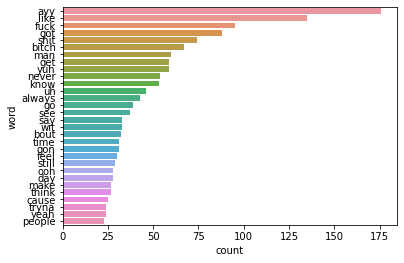

In [99]:
# Visualize the words
# Rich Brian
sns.barplot(data=new_rb_words_df[0:30], x= "count", y = "word") 

<AxesSubplot:xlabel='count', ylabel='word'>

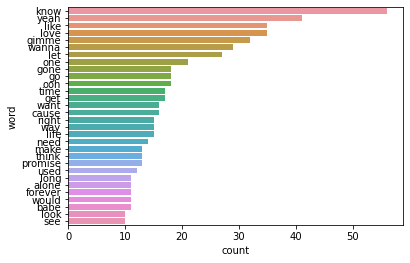

In [100]:
# Joji
sns.barplot(data=new_joji_words_df[0:30], x= "count", y = "word") 

# Bag of Words and Naive Bayes & Random Forest Algorithm to Predit Artist based on Lyric Sentiment

In [174]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [349]:
df_88 = pd.read_csv('formatted_lyrics_88.csv')
df_88.head()

,Unnamed: 0.1,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre,formatted_lyrics
0,0,0,BIBI Vengeance,Lowlife Princess: Noir,BIBI,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,...,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\nWatch m..."
1,1,1,KAZINO,KAZINO,BIBI,68,BIBI,2020-04-29,245onUPHGD1DYuiacxTuW0,0.625,...,0.000000,0.1100,0.263,133.041,185947,4,"[비비 ""사장님 도박은 재미로 하셔야 합니다"" 가사][Verse 1]Dice and...",Dice and Ice cube Home girls bitches Spin it ...,"['R&B', 'South Korea', 'Trap', 'Korean']","\n[ "" "" ]\n\n[Verse ]\nDice and Ice cube \nHom..."
2,2,2,Animal Farm,Animal Farm,BIBI,67,BIBI,2022-09-27,3gAXVQOR0h7Ks71lsr5MFZ,0.617,...,0.000006,0.5500,0.375,107.971,203946,3,"[비비 ""가면무도회"" 가사][Verse 1]죄악의 단어위선의 가면넘쳐흐르는 무도회장...",champagne It might be pretty it might be beau...,"['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...","\n[ """" ]\n\n[Verse ]\n champagne \n[Pre-Chorus..."
3,3,3,BAD SAD AND MAD,Life is a Bi…,BIBI,66,BIBI,2021-04-28,0zPbUxvYRlCGwruakkXPLI,0.746,...,0.000190,0.0904,0.638,90.013,154988,4,"[비비 ""BAD SAD AND MAD"" 가사][Refrain]You blued my...",BAD SAD AND MAD Refrain You blued my bruisePi...,"['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...","\n[ ""BAD SAD AND MAD"" ]\n\n[Refrain]\nYou blue..."
4,5,5,Restless,LISTEN 035 Restless,BIBI,62,BIBI,2020-02-02,4AHNi316rl3KI3hKIsdxZe,0.575,...,0.000112,0.1150,0.298,89.985,267080,4,"[비비 ""신경쓰여"" 가사][Verse 1]불 꺼진 방안 뒹굴다전화는 왜 잠만 잘 자...",,"['R&B', 'South Korea', 'K-R&B', 'Korean']","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\n \n[Cho..."


In [178]:
df_88['artist'].value_counts()

CHUNG HA            47
Rich Brian          27
Warren Hue          24
Jackson Wang        23
Joji                22
Dumbfoundead        21
BIBI                19
Lexie Liu           17
Higher Brothers     16
Keith Ape           16
Stephanie Poetri    14
Guapdad 4000        13
Mili                13
Seori                9
Name: artist, dtype: int64

In [350]:
# Encode Artist names
artist_code = {}
num = 0
for name in df_88['artist'].unique():
    artist_code.update({name: num})
    num+=1
artist_code_dict={'artist': artist_code}
print(artist_code_dict)


{'artist': {'BIBI': 0, 'CHUNG HA': 1, 'Dumbfoundead': 2, 'Rich Brian': 3, 'Guapdad 4000': 4, 'Higher Brothers': 5, 'Jackson Wang': 6, 'Joji': 7, 'Keith Ape': 8, 'Lexie Liu': 9, 'Mili': 10, 'Seori': 11, 'Stephanie Poetri': 12, 'Warren Hue': 13}}


In [351]:
# Create a column with artist codes
updated_df = df_88.replace(artist_code_dict)
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre,formatted_lyrics
0,0,0,BIBI Vengeance,Lowlife Princess: Noir,0,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,...,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\nWatch m..."
1,1,1,KAZINO,KAZINO,0,68,BIBI,2020-04-29,245onUPHGD1DYuiacxTuW0,0.625,...,0.000000,0.1100,0.263,133.041,185947,4,"[비비 ""사장님 도박은 재미로 하셔야 합니다"" 가사][Verse 1]Dice and...",Dice and Ice cube Home girls bitches Spin it ...,"['R&B', 'South Korea', 'Trap', 'Korean']","\n[ "" "" ]\n\n[Verse ]\nDice and Ice cube \nHom..."
2,2,2,Animal Farm,Animal Farm,0,67,BIBI,2022-09-27,3gAXVQOR0h7Ks71lsr5MFZ,0.617,...,0.000006,0.5500,0.375,107.971,203946,3,"[비비 ""가면무도회"" 가사][Verse 1]죄악의 단어위선의 가면넘쳐흐르는 무도회장...",champagne It might be pretty it might be beau...,"['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...","\n[ """" ]\n\n[Verse ]\n champagne \n[Pre-Chorus..."
3,3,3,BAD SAD AND MAD,Life is a Bi…,0,66,BIBI,2021-04-28,0zPbUxvYRlCGwruakkXPLI,0.746,...,0.000190,0.0904,0.638,90.013,154988,4,"[비비 ""BAD SAD AND MAD"" 가사][Refrain]You blued my...",BAD SAD AND MAD Refrain You blued my bruisePi...,"['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...","\n[ ""BAD SAD AND MAD"" ]\n\n[Refrain]\nYou blue..."
4,5,5,Restless,LISTEN 035 Restless,0,62,BIBI,2020-02-02,4AHNi316rl3KI3hKIsdxZe,0.575,...,0.000112,0.1150,0.298,89.985,267080,4,"[비비 ""신경쓰여"" 가사][Verse 1]불 꺼진 방안 뒹굴다전화는 왜 잠만 잘 자...",,"['R&B', 'South Korea', 'K-R&B', 'Korean']","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\n \n[Cho..."


In [352]:
np.bincount(updated_df.artist)

array([19, 47, 21, 27, 13, 16, 23, 22, 16, 17, 13,  9, 14, 24],
      dtype=int64)

In [353]:
# Drop any missing values
no_missing_df = updated_df.dropna()
print(len(no_missing_df), len(updated_df))

281 281


In [221]:
# Split lyrics by line
# Remove extra words like [Artist:], [Verse], etc
test1 = updated_df.iloc[0:5,:]
test1.head()

,Unnamed: 0.1,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre,formatted_lyrics
0,0,0,BIBI Vengeance,Lowlife Princess: Noir,0,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,...,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\nWatch m..."
1,1,1,KAZINO,KAZINO,0,68,BIBI,2020-04-29,245onUPHGD1DYuiacxTuW0,0.625,...,0.000000,0.1100,0.263,133.041,185947,4,"[비비 ""사장님 도박은 재미로 하셔야 합니다"" 가사][Verse 1]Dice and...",Dice and Ice cube Home girls bitches Spin it ...,"['R&B', 'South Korea', 'Trap', 'Korean']","\n[ "" "" ]\n\n[Verse ]\nDice and Ice cube \nHom..."
2,2,2,Animal Farm,Animal Farm,0,67,BIBI,2022-09-27,3gAXVQOR0h7Ks71lsr5MFZ,0.617,...,0.000006,0.5500,0.375,107.971,203946,3,"[비비 ""가면무도회"" 가사][Verse 1]죄악의 단어위선의 가면넘쳐흐르는 무도회장...",champagne It might be pretty it might be beau...,"['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...","\n[ """" ]\n\n[Verse ]\n champagne \n[Pre-Chorus..."
3,3,3,BAD SAD AND MAD,Life is a Bi…,0,66,BIBI,2021-04-28,0zPbUxvYRlCGwruakkXPLI,0.746,...,0.000190,0.0904,0.638,90.013,154988,4,"[비비 ""BAD SAD AND MAD"" 가사][Refrain]You blued my...",BAD SAD AND MAD Refrain You blued my bruisePi...,"['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...","\n[ ""BAD SAD AND MAD"" ]\n\n[Refrain]\nYou blue..."
4,5,5,Restless,LISTEN 035 Restless,0,62,BIBI,2020-02-02,4AHNi316rl3KI3hKIsdxZe,0.575,...,0.000112,0.1150,0.298,89.985,267080,4,"[비비 ""신경쓰여"" 가사][Verse 1]불 꺼진 방안 뒹굴다전화는 왜 잠만 잘 자...",,"['R&B', 'South Korea', 'K-R&B', 'Korean']","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\n \n[Cho..."


In [ ]:
test1_explode = test1.assign(formatted_lyrics=test1.formatted_lyrics.str.split("\n")).explode('formatted_lyrics')
test1_explode.dropna(inplace=True)
test1_explode.reset_index(drop = True, inplace=True)
test1_explode[0:4]

In [291]:
from string import ascii_letters, punctuation

In [308]:
# if lyric row contains [], remove
watdis=test1_explode.formatted_lyrics[4]
watdis2 = test1_explode.formatted_lyrics[106]
row_drop = []
items_to_drop = ['\n', "[", "]"]

letters = set(ascii_letters)

for row in test1_explode['formatted_lyrics']:
    if len(row) == 0:
        row_drop.append(row)
    elif (row in (letters) == False):
        row_drop.append(row)
    elif row == watdis or row == watdis2:
        row_drop.append(row)
    else:
        for char in row:
            if char in items_to_drop:
                row_drop.append(row)
                break

test1_clean = test1_explode.loc[test1_explode['formatted_lyrics'].isin(row_drop) == False] 
#dup_test1.drop(row_drop, axis = 0, inplace=True)
test1_clean.head(1)
print(len(test1_clean), len(test1_explode))

61 111


In [287]:
test1_clean2 = test1_clean[test1_clean['formatted_lyrics'].apply(lambda x : len(x))>0]
print(len(test1_clean), len(test1_clean2))

82 71


In [311]:
print(test1_clean['formatted_lyrics'].unique())

['Watch me dance' 'Watch me sing ' 'I got mercy, I got grace'
 'Desperado with the scales' 'Throw a rose on your body'
 "Mask of Zorro I'm so wanted " 'Look scared ' 'Dice and Ice cube '
 'Home girls bitches ' 'Spin it, spin it,pussy '
 'Chips andchips and chips and ' 'Demon under the table '
 'Risk it, risk it, risk it, till the last dime' 'Yeah, yeah, yeah'
 'Risk it, risk it, risk it, till the last'
 'B-b-bitches, Ice and home girl, on you, on, home girl'
 'Bitches, Ice and home girl, on you, on, home girl' 'Bitches, bitches'
 'Risk it till the last dime'
 'Give me that, hook that, spin that, roulette' 'Vodka, in my cup, '
 'Spin it, tip it, strip it, shawty' 'Taste the muzzle of a gun'
 'Taste the of money' "You think I'm dazzle up my "
 "Tie that bitch ain't funny chips checks matches and chicks"
 ' champagne ' 'It might be pretty, it might be beautiful'
 'It might be grand' 'This might be right, this might be justice' 'But I'
 'Welcome, well done'
 'Shameless friends of mine ?Han

In [313]:
# Clean actual data
df_explode = updated_df.assign(formatted_lyrics=updated_df.formatted_lyrics.str.split("\n")).explode('formatted_lyrics')
df_explode.dropna(inplace=True)
df_explode.reset_index(drop = True, inplace=True)


row_drop = []
items_to_drop = ['\n', "[", "]"]

letters = set(ascii_letters)

for row in df_explode['formatted_lyrics']:
    if len(row) == 0:
        row_drop.append(row)
    elif (row in (letters) == False):
        row_drop.append(row)
    elif row == watdis or row == watdis2:
        row_drop.append(row)
    else:
        for char in row:
            if char in items_to_drop:
                row_drop.append(row)
                break

df_clean = df_explode.loc[df_explode['formatted_lyrics'].isin(row_drop) == False] 
#dup_test1.drop(row_drop, axis = 0, inplace=True)
df_clean.head(1)
print(len(df_clean), len(df_explode))

7461 9476


In [316]:
df_clean['formatted_lyrics']

6                                          Watch me dance
7                                          Watch me sing 
8                                          Watch me dance
9                                          Watch me sing 
13                               I got mercy, I got grace
                              ...                        
9470    Will you spend the night doing some dumb shit?...
9471                 (Jaded off your love, faded off you)
9472                                            Would you
9473    Would you tell me you love me back?(Jaded off ...
9474                                       (Jaded, oh no)
Name: formatted_lyrics, Length: 7461, dtype: object

In [340]:
np.bincount(df_clean['artist'])

array([ 248,  607,  797, 1047,  489,  354,  776,  566,  450,  345,  403,
        148,  398,  833], dtype=int64)

In [377]:
df_artist_lyric = df_clean[['artist', 'formatted_lyrics']].reset_index(drop=True)
df_artist_lyric

,artist,formatted_lyrics
0,0,Watch me dance
1,0,Watch me sing
2,0,Watch me dance
3,0,Watch me sing
4,0,"I got mercy, I got grace"
...,...,...
7456,13,Will you spend the night doing some dumb shit?...
7457,13,"(Jaded off your love, faded off you)"
7458,13,Would you
7459,13,Would you tell me you love me back?(Jaded off ...


In [379]:
# Save csv file
df_artist_lyric.to_csv('lyrics88_by_line.csv')

In [317]:
# Vectorize the lyrics
vect = CountVectorizer()

In [334]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['formatted_lyrics'], df_clean['artist'], random_state=25)

In [335]:
print(f"train: {np.bincount(y_train)}")
print(f"test: {np.bincount(y_test)}")

train: [181 456 585 794 370 253 587 412 348 255 303 111 311 629]
test: [ 67 151 212 253 119 101 189 154 102  90 100  37  87 204]


In [336]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [337]:
feature_names = vect.get_feature_names()
print(f"Num Features: {len(feature_names)}")

Num Features: 4556


c:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [338]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print(f"Training score: {nb.score(X_train, y_train)}")
print(f"Testing score: {nb.score(X_test, y_test)}")

Training score: 0.6366398570151921
Testing score: 0.40514469453376206


In [341]:
# Test Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [384]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9824843610366398
Testing Score: 0.5080385852090032
